### "Sales forecast"
# Por: Edwin Gustavo Lima

 Predecir la variable ventas con Facebook Prophet

Librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Montar la carpeta de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se carga el archivo "Employee_Attrition.csv" desde google drive 

In [ ]:
sales_df = pd.read_csv("/content/drive/My Drive/ProyectoFinalAD/online_retail_II final.csv")

In [ ]:
sales_df['invoicedate'] = pd.to_datetime(sales_df['invoicedate'])

In [ ]:
sales_df['sales'] = sales_df['quantity'] * sales_df['price']

# Se realiza un análisis exploratorio





In [ ]:
sales_df.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,price,customerid,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


Mostrando los últimos 5 registros del data set

In [ ]:
sales_df.tail(5)

,invoiceno,stockcode,description,quantity,invoicedate,price,customerid,country,sales
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85
824363,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.00


Se realiza una revisión de las caracteristicas del data set

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    824364 non-null  object        
 1   stockcode    824364 non-null  object        
 2   description  824364 non-null  object        
 3   quantity     824364 non-null  int64         
 4   invoicedate  824364 non-null  datetime64[ns]
 5   price        824364 non-null  float64       
 6   customerid   824364 non-null  int64         
 7   country      824364 non-null  object        
 8   sales        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 56.6+ MB


Se realiza un resumen de las variables númericas.

In [ ]:
sales_df.describe()

,quantity,price,customerid,sales
count,824364.000000,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504,20.195317
std,188.976099,70.241388,1697.464450,308.685001
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13975.000000,4.250000
50%,5.000000,1.950000,15255.000000,11.250000
75%,12.000000,3.750000,16797.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


Se hace una revisión de la cantidad de valores nules por campo.

In [ ]:
sales_df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customerid     0
country        0
sales          0
dtype: int64

Utilizamos matplotlib para validar gráficamente que no existen valores nulos.

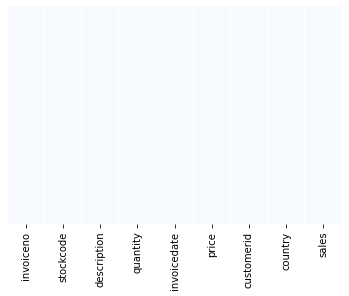

In [ ]:
sns.heatmap(sales_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e1d94c10>,
      dtype=object)

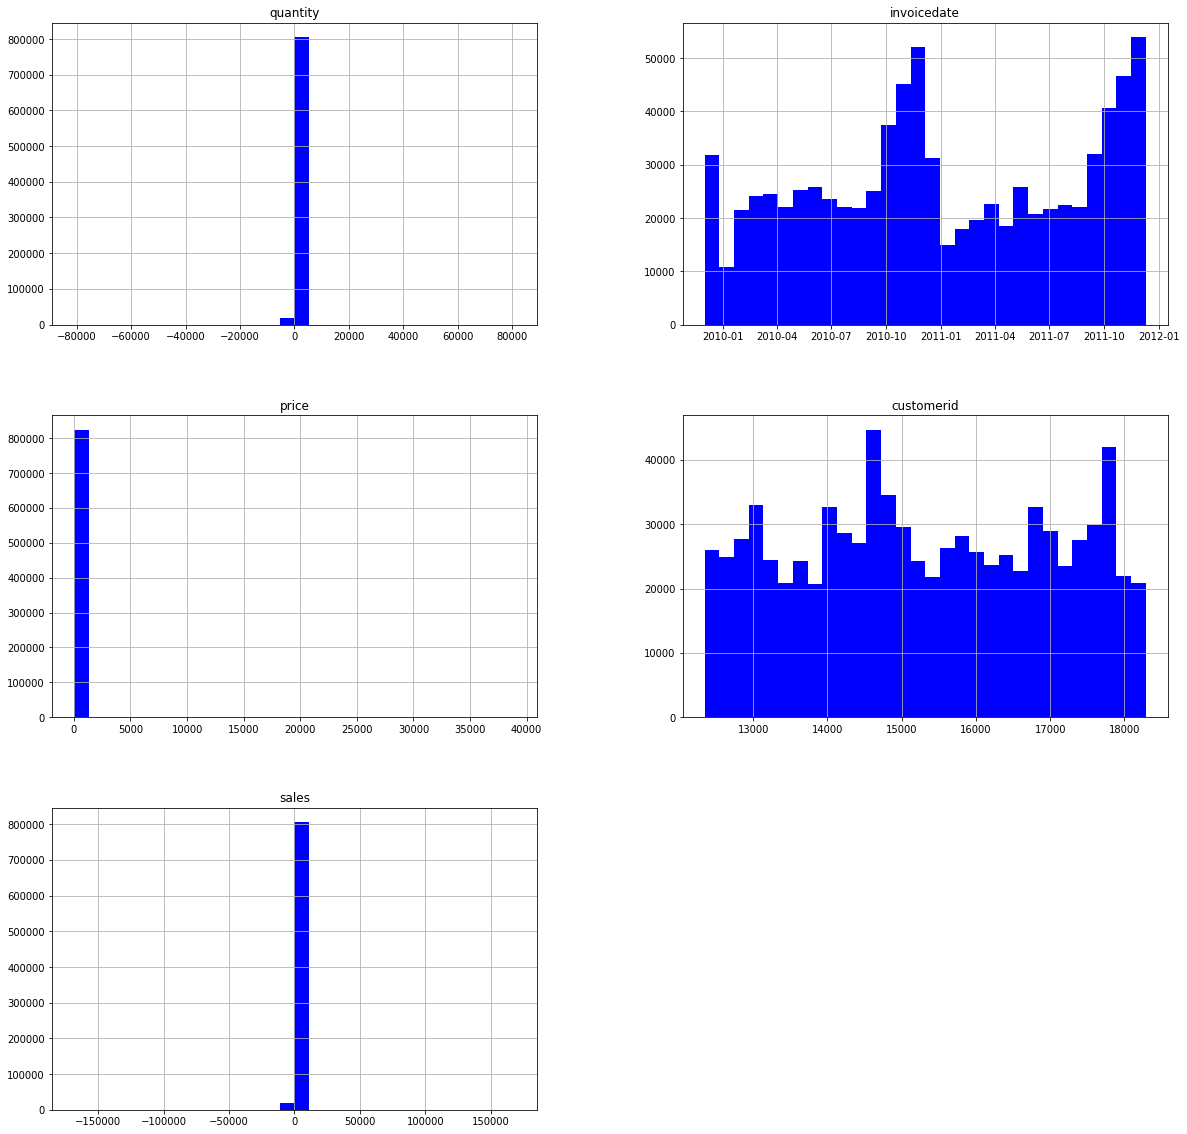

In [ ]:
sales_df.hist(bins = 30, figsize=(20,20), color = 'b')


Filtramos todas las ventas positivas

In [ ]:
sales_df = sales_df[sales_df['sales'] >= 0]

Verificamos si en el grafico si todavia existen valores de venta negativos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1de468a10>,
      dtype=object)

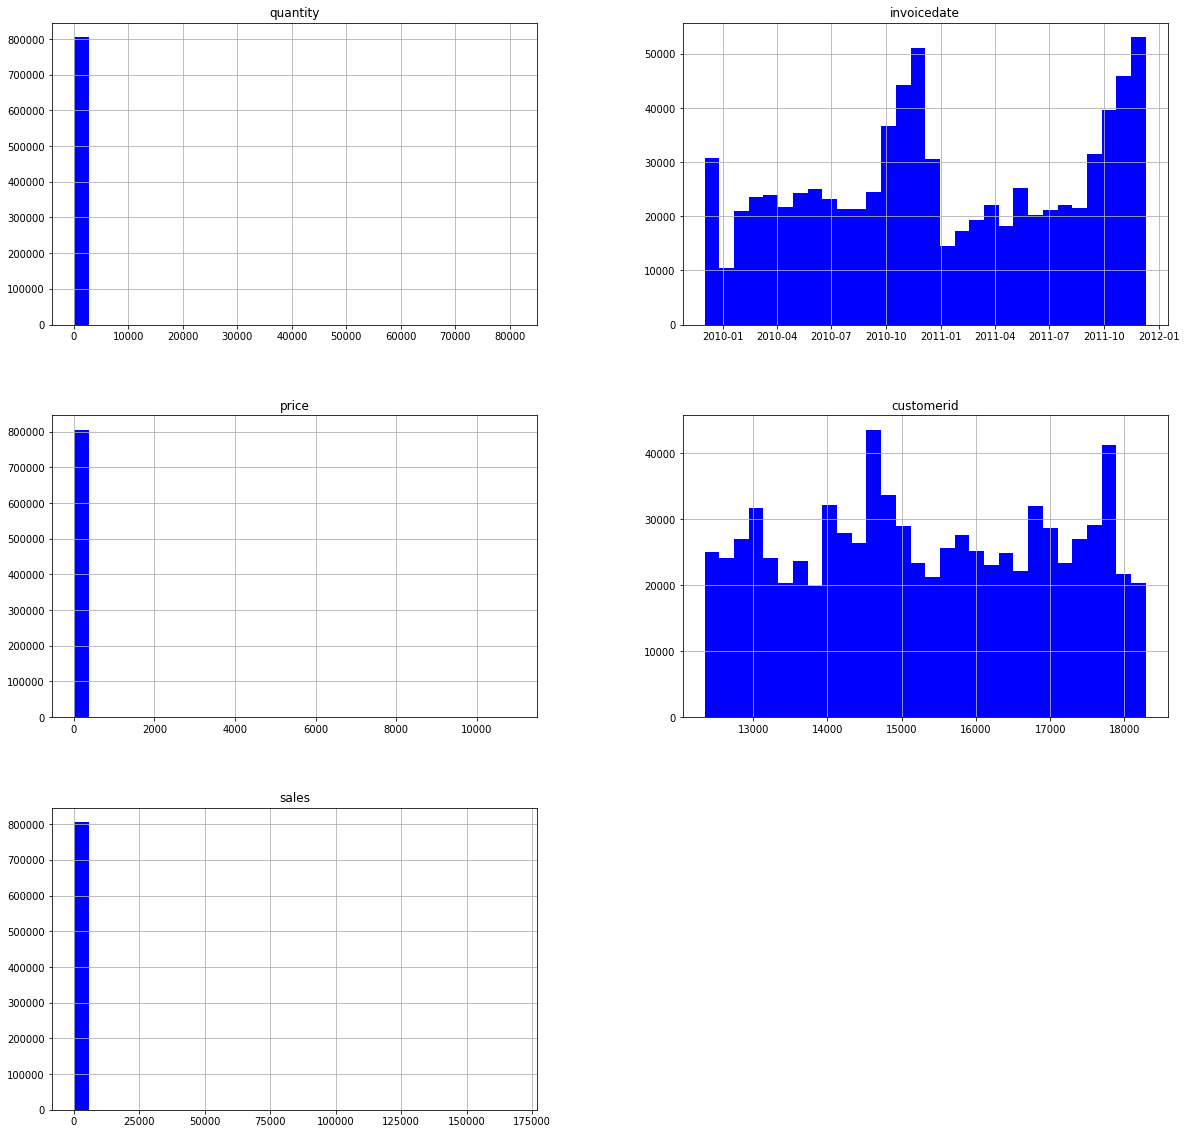

In [ ]:
sales_df.hist(bins = 30, figsize=(20,20), color = 'b')

## Análisis númerico

Se realiza agrupamiento por País y por descripción de Producto

In [ ]:
paises_df = sales_df.groupby(['country'])
articulos_df = sales_df.groupby(['description'])

In [ ]:
print("Total de ventas = {} ".format(len(sales_df)))
print("Numero de paises = {}".format(len(paises_df)))
print("Cantidad de articulos = {}".format(len(articulos_df)))
print("Monto de ventas = {}".format(round(sales_df['sales'].sum()),2))
print("Promedio por venta = {}".format(round(sales_df['sales'].mean()),2))

Total de ventas = 805620 
Numero de paises = 41
Cantidad de articulos = 5283
Monto de ventas = 17743429
Promedio por venta = 22


Graficamos la matriz de correlación para validar que variables se encuentran fuertemente relacionadas

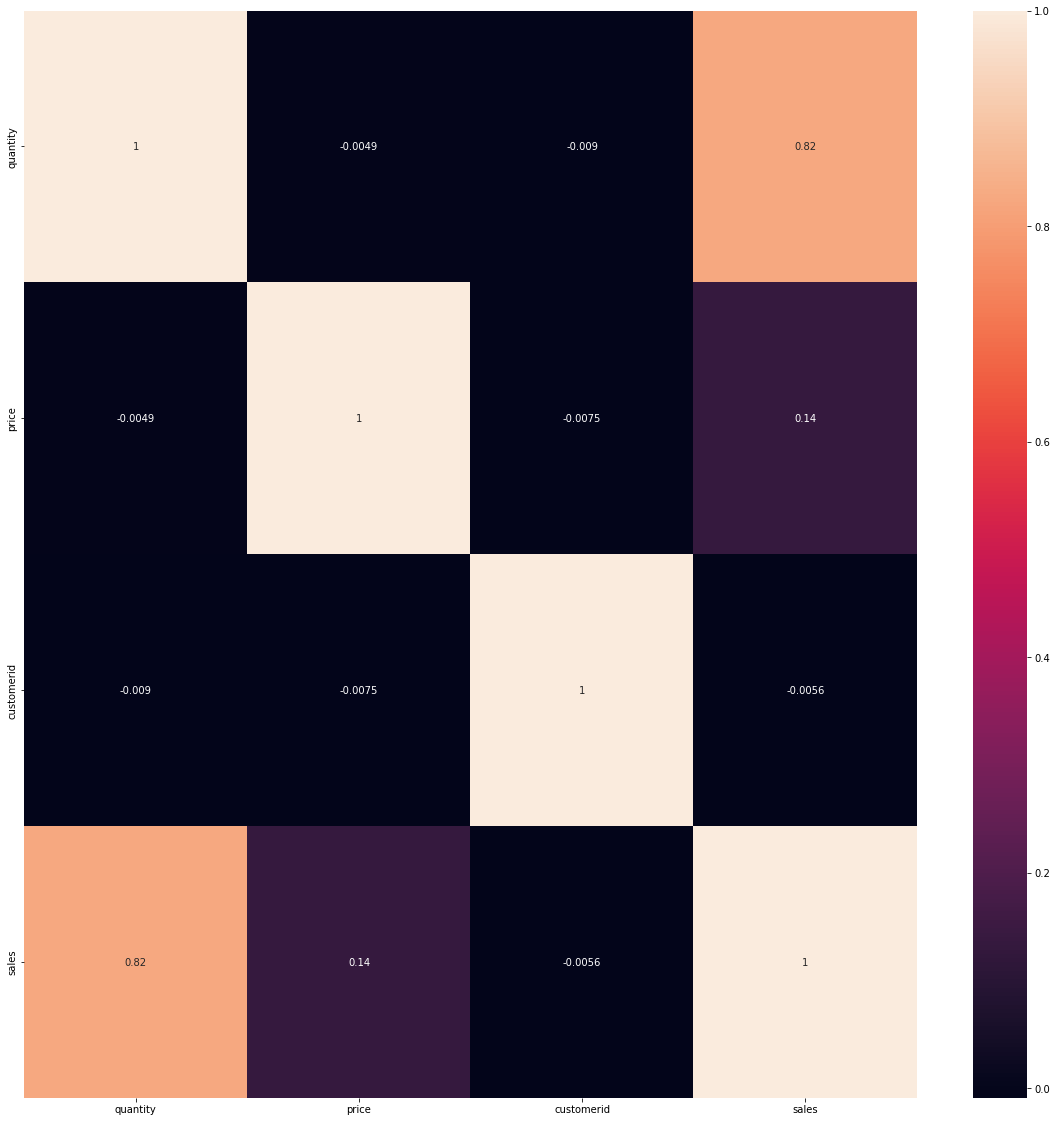

In [ ]:
correlations = sales_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

Máximo y Mínimo de ventas

In [ ]:
sales_df["sales"].max()

168469.6

In [ ]:
sales_df["sales"].min()

0.0

# Forecast Facebook Prophet

Se prepara nuestro data set para la prediccion ds la fecha y y el campo a predecir

In [ ]:
sales_df.rename(columns={'invoicedate':'ds'},inplace = True)

In [ ]:
sales_df.rename(columns={'sales':'y'},inplace = True)

In [ ]:
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se crea el modelo Prophet

In [ ]:
model = Prophet()

Se entrena el modelo.

In [ ]:
model.fit(sales_df)

06:39:47 - cmdstanpy - INFO - Chain [1] start processing
06:41:02 - cmdstanpy - INFO - Chain [1] done processing


#Se realiza un forecast de un año para la variable ventas.

In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forecast = model.predict(future)

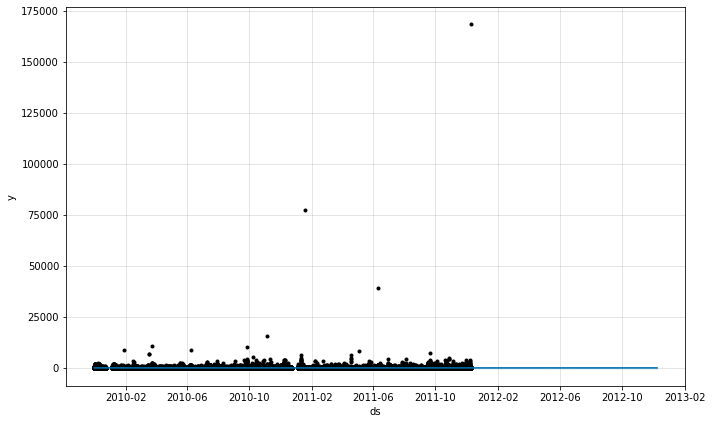

In [ ]:
fig1 = model.plot(forecast)

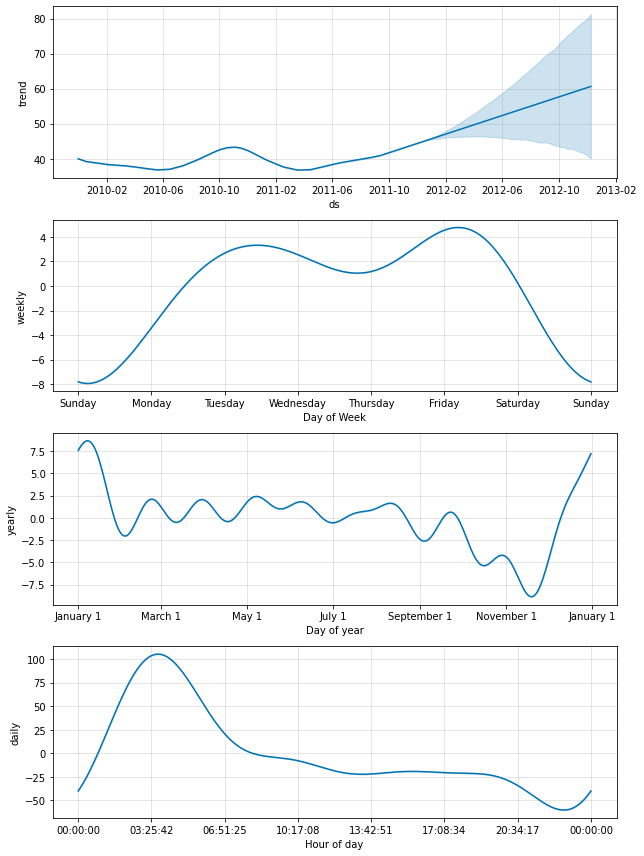

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-01 07:45:00,40.006644,-238.730718,318.933133,40.006644,40.006644,2.783340,2.783340,2.783340,3.995178,...,3.275755,3.275755,3.275755,-4.487593,-4.487593,-4.487593,0.0,0.0,0.0,42.789984
1,2009-12-01 07:46:00,40.006610,-246.548229,333.841906,40.006610,40.006610,2.583386,2.583386,2.583386,3.794303,...,3.276276,3.276276,3.276276,-4.487193,-4.487193,-4.487193,0.0,0.0,0.0,42.589997
2,2009-12-01 09:06:00,40.003873,-230.154537,312.002124,40.003873,40.003873,-5.094844,-5.094844,-5.094844,-3.947712,...,3.308004,3.308004,3.308004,-4.455136,-4.455136,-4.455136,0.0,0.0,0.0,34.909029
3,2009-12-01 09:08:00,40.003805,-236.566711,331.268957,40.003805,40.003805,-5.174926,-5.174926,-5.174926,-4.029138,...,3.308546,3.308546,3.308546,-4.454334,-4.454334,-4.454334,0.0,0.0,0.0,34.828879
4,2009-12-01 09:24:00,40.003257,-257.835153,296.831830,40.003257,40.003257,-5.810786,-5.810786,-5.810786,-4.675315,...,3.312448,3.312448,3.312448,-4.447920,-4.447920,-4.447920,0.0,0.0,0.0,34.192471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,2012-12-04 12:50:00,60.457016,-235.230428,351.134778,40.568900,80.615040,-20.955586,-20.955586,-20.955586,-21.766139,...,3.295802,3.295802,3.295802,-2.485249,-2.485249,-2.485249,0.0,0.0,0.0,39.501430
34952,2012-12-05 12:50:00,60.500533,-234.339189,345.622529,40.421007,80.724086,-22.400816,-22.400816,-22.400816,-21.766139,...,1.290203,1.290203,1.290203,-1.924880,-1.924880,-1.924880,0.0,0.0,0.0,38.099717
34953,2012-12-06 12:50:00,60.544051,-256.390193,348.498586,40.289936,80.907966,-20.296273,-20.296273,-20.296273,-21.766139,...,2.851729,2.851729,2.851729,-1.381863,-1.381863,-1.381863,0.0,0.0,0.0,40.247778
34954,2012-12-07 12:50:00,60.587568,-234.189649,337.622801,40.160844,81.086825,-18.710612,-18.710612,-18.710612,-21.766139,...,3.915425,3.915425,3.915425,-0.859898,-0.859898,-0.859898,0.0,0.0,0.0,41.876956


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

                   ds       yhat  yhat_lower  yhat_upper
0 2009-12-01 07:45:00  42.789984 -238.730718  318.933133
1 2009-12-01 07:46:00  42.589997 -246.548229  333.841906
2 2009-12-01 09:06:00  34.909029 -230.154537  312.002124
3 2009-12-01 09:08:00  34.828879 -236.566711  331.268957
4 2009-12-01 09:24:00  34.192471 -257.835153  296.831830
